## Description
---
There are six basic image processing problems in shown in this file as part of CSE 527 Course work at Stony Brook University - Thresholding, Gaussian Convolution, Median Filtering, Laplacian of a Gaussian, Histogram equalisation, High Pass and Low Pass Filtering. 

## THRESHOLDING
---
Applying image thresholding to an image. 

In [0]:
import sys
import  cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, misc
from IPython.display import display, Image
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.preprocessing import normalize


In [0]:

# function for image thresholding
def imThreshold(img, threshold, maxVal):
    assert len(img.shape) == 2 # input image has to be gray
    
    height, width = img.shape
    bi_img = np.zeros((height, width), dtype=np.uint8)
    for x in range(height):
        for y in range(width):
            if img.item(x, y) > threshold:
                bi_img.itemset((x, y), maxVal)
                
    return bi_img

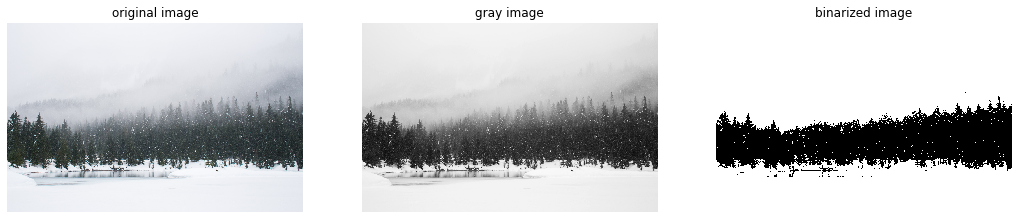

In [0]:
# read the image for local directory (same with this .ipynb) 
img = cv2.imread('SourceImages/Snow.jpg')

# convert a color image to gray
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# image thresholding using global tresholder
img_bi = imThreshold(img_gray, 127, 255)

# Be sure to convert the color space of the image from
# BGR (Opencv) to RGB (Matplotlib) before you show a 
# color image read from OpenCV
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('original image')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_gray, 'gray')
plt.title('gray image')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_bi, 'gray')
plt.title('binarized image')
plt.axis("off")

plt.show()

## Gaussian convolution
---

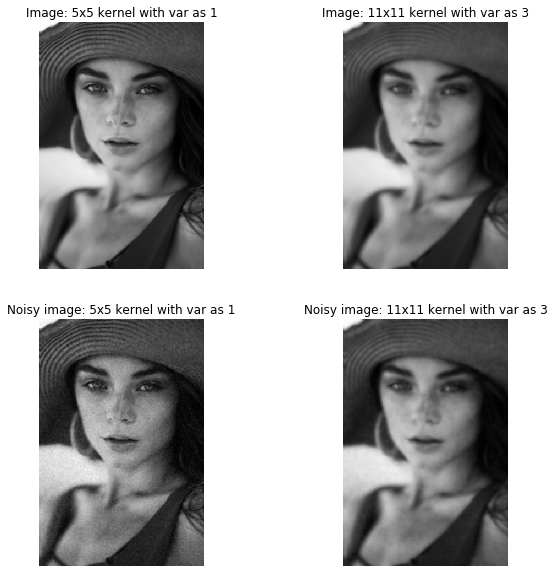

In [0]:
import math
def gaussianFunction(x,y, sigma):
    exp = (pow(x,2) + pow(y,2)) / (2*sigma *sigma) 
    temp = pow(math.e, exp * -1)
    return temp/(2*math.pi*sigma*sigma)

def genGaussianKernel(width, sigma):
    
    shift = sigma / 2
    # Create new 2D Matrix 
    kernel_2d = np.fromfunction(lambda i, j: gaussianFunction(i-shift,j-shift,sigma), (width, width), dtype=int)
    # define your 2d kernel here
    kernel_2d = kernel_2d / np.sum(kernel_2d)
    return kernel_2d

# Load images
img       = cv2.imread('SourceImages/pic.jpg', 0)
img_noise = cv2.imread('SourceImages/pic_noisy.jpg', 0)

# Generate Gaussian kernels
kernel_1 = genGaussianKernel(5, 1)     # 5 by 5 kernel with sigma of 1
kernel_2 = genGaussianKernel(11, 3)      # 11 by 11 kernel with sigma of 3

# Convolve with image and noisy image
# use cv2.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]) → dst
# Ask about parameters 
res_img_kernel1 = cv2.filter2D(img,-1, kernel_1)
res_img_kernel2 = cv2.filter2D(img, -1,kernel_2)
res_img_noise_kernel1 = cv2.filter2D(img_noise, -1,kernel_1)
res_img_noise_kernel2 = cv2.filter2D(img_noise, -1,kernel_2)

# Write out result images
cv2.imwrite("Results/P1_01.jpg", res_img_kernel1)
cv2.imwrite("Results/P1_02.jpg", res_img_kernel2)
cv2.imwrite("Results/P1_03.jpg", res_img_noise_kernel1)
cv2.imwrite("Results/P1_04.jpg", res_img_noise_kernel2)

# Plot results
plt.figure(figsize = (10, 10))
plt.subplot(2, 2, 1)
plt.imshow(res_img_kernel1, 'gray')
plt.title('Image: 5x5 kernel with var as 1')
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(res_img_kernel2, 'gray')
plt.title('Image: 11x11 kernel with var as 3')
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(res_img_noise_kernel1, 'gray')
plt.title('Noisy image: 5x5 kernel with var as 1')
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(res_img_noise_kernel2, 'gray')
plt.title('Noisy image: 11x11 kernel with var as 3')
plt.axis("off")

plt.show()


**Median filter** \\





(a)We write a function to generate an image with salt and pepper noise. The function takes two arguments, the input image and the probability that a pixel location has salt-pepper noise. A simple implementation can be to select pixel locations with probability 'p' where noise occurs and then with equal probability set the pixel value at those location to be 0 or 255. \\
(b)We write a function to implement a median filter. The function takes two arguments, an image and a window size(if window size is 'k', then a kxk window is used to determine the median pixel value at a location) and returns the output image. This can also be implemented using inbuilt library (like scipy.ndimage_filter) to directly generate the result.


/home/sk/anaconda3/envs/cv/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # This is added back by InteractiveShellApp.init_path()
/home/sk/anaconda3/envs/cv/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


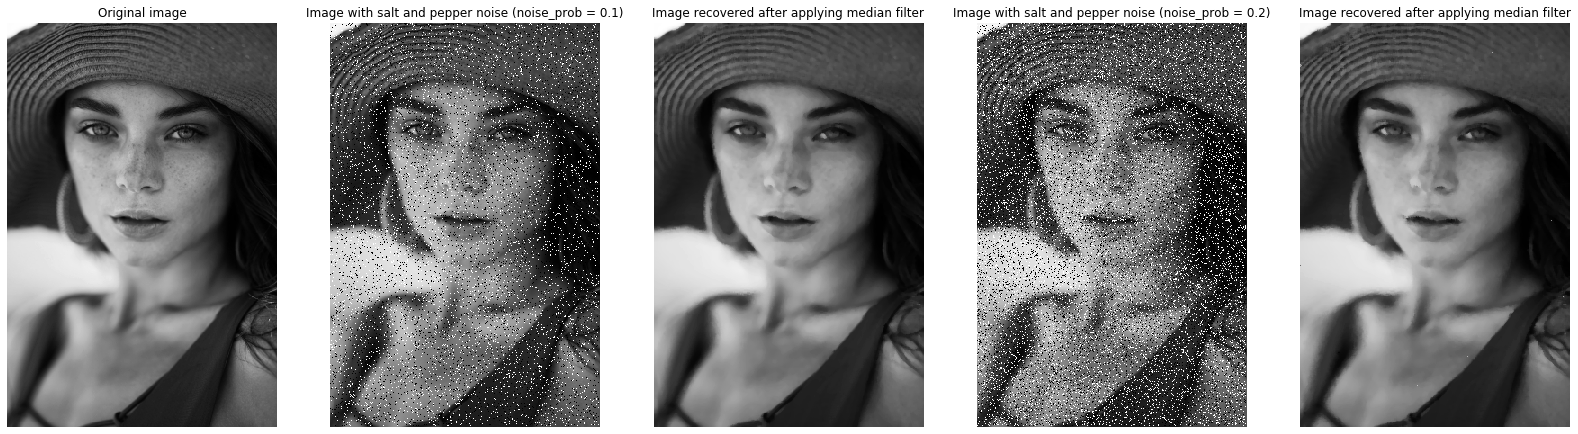

In [0]:
# Function to generate image with salt and pepper noise

import random
import cv2
import numpy as np

#Part A 
def noisy_image_generator(img_in, probability = 0.1):
    result = np.copy(img_in)
    noise_pixel = np.ceil(probability * img_in.size * 0.5)
    pixel_to_change = [np.random.randint(0, i - 1, int(noise_pixel)) for i in img_in.shape]
    result[pixel_to_change] = 0
    noise_pixel = np.ceil(probability * img_in.size * 0.5)
    pixel_to_change = [np.random.randint(0, i - 1, int(noise_pixel)) for i in img_in.shape]
    result[pixel_to_change] = 255
    return result
  
  
# Function to apply median filter(window size kxk) on the input image  
        
#Part B 
def median_filter(img_in, window_size = 5):
    
    result = np.copy(img_in)
    rows, cols = img_in.shape
    #print(np.median(img_in[:2,:2]))
    radius = int((window_size - 1) / 2)
    for i in range(0, rows):
        for j in range(0, cols):
             result[i,j] = np.median(img_in[max(i - radius,0): min(i + radius,rows), max(j - radius,0) : min(cols,j+ radius)])
    return result

img = cv2.imread('SourceImages/pic.jpg', 0)
image_s_p1 = noisy_image_generator(img, probability = 0.1)  
result1 = median_filter(image_s_p1, window_size = 5)

image_s_p2 = noisy_image_generator(img, probability = 0.2)  
result2 = median_filter(image_s_p2, window_size = 5)

cv2.imwrite("Results/P1_05.jpg", result1)    
cv2.imwrite("Results/P1_06.jpg", result2)    

# Plot results
plt.figure(figsize = (28, 20))
plt.subplot(1, 5, 1)
plt.imshow(img, 'gray')
plt.title('Original image')
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(image_s_p1, 'gray')
plt.title('Image with salt and pepper noise (noise_prob = 0.1)')
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(result1, 'gray')
plt.title('Image recovered after applying median filter')
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(image_s_p2, 'gray')
plt.title('Image with salt and pepper noise (noise_prob = 0.2)')
plt.axis("off")

plt.subplot(1, 5, 5)
plt.imshow(result2, 'gray')
plt.title('Image recovered after applying median filter')
plt.axis("off")

plt.show()

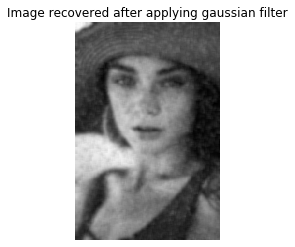

In [0]:
# Noise removal after gaussian filtering 
kernel_x = genGaussianKernel(11, 4) 
result3 = cv2.filter2D(image_s_p1,-1, kernel_x)

plt.imshow(result3, 'gray')
plt.title('Image recovered after applying gaussian filter')
plt.axis("off")
plt.show()


- **Laplacian of Gaussian:** Convolve a 23 by 23 Gaussian of sigma = 3 with the discrete approximation to the Laplacian kernel [1 1 1; 1 -8 1; 1 1 1]. We plot the Gaussian kernel and 2D Laplacian of Gaussian using the `Matplotlib` function `plot`. Use the `Matplotlib` function `plot_surface` to generate a 3D plot of LoG. 

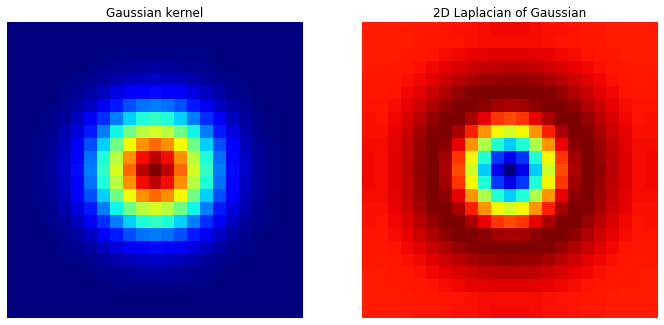

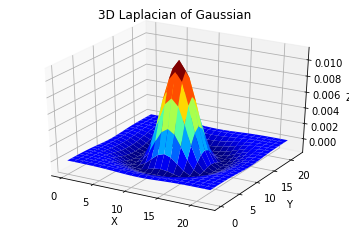

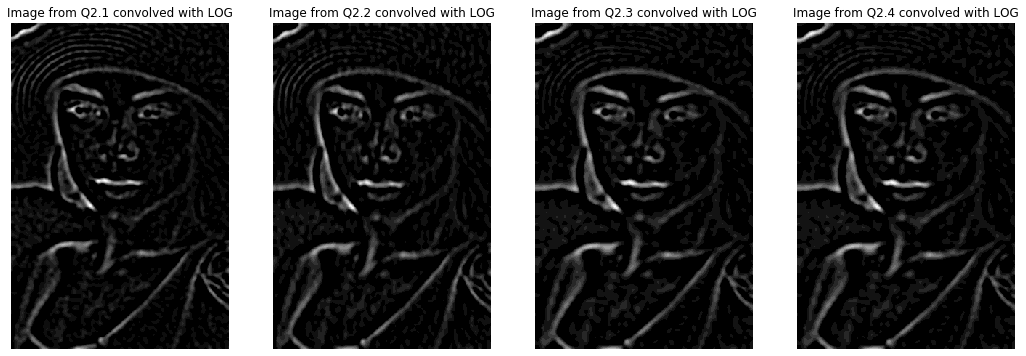

In [0]:
width = 23
sigma = 3

from mpl_toolkits.mplot3d import Axes3D  

# Create your Laplacian kernel
Laplacian_kernel = np.array([[1,1,1],[1,-8,1],[1,1,1]])
# Fill in your code here


# Create your Gaussian kernel

def gkern(width, sig):
    shift = math.floor((width - 1)/2)
    ax = np.linspace(-shift, shift, width)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
    return kernel / np.sum(kernel)


#Gaussian_kernel = genGaussianKernel(width, sigma) 

Gaussian_kernel = gkern(width, sigma)
#print (Gaussian_kernel)
# Fill in your code here

# Create your Laplacian of Gaussian
LoG = cv2.filter2D(Gaussian_kernel,-1, Laplacian_kernel)
# Fill in your code here

# Plot Gaussian and Laplacian
fig = plt.figure(figsize=(18, 18))
plt.subplot(1, 3, 1)
plt.imshow(Gaussian_kernel, cmap=cm.jet)
plt.title('Gaussian kernel')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(LoG,  cmap=cm.jet)
plt.title('2D Laplacian of Gaussian')
plt.axis("off")

# Plot the 3D figure of LoG

def get_val(i,j):
    return LoG[i,j]

shift = width // 2
fig = plt.figure()
ax = plt.axes(projection='3d')
shift = width // 2
X, Y = np.meshgrid(range(width), range(width))
Z = -get_val(X, Y )
ax.plot_surface(X, Y, Z, cmap=cm.jet, rstride=1, cstride=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Laplacian of Gaussian')
plt.show()



def Lapplacian_of_Gaussian(x, y, sigma):
    temp = (x*x + y*y) / (2 * sigma*sigma) * -1
    return 1 / (math.pi * sigma ** 4) * (1 - temp) * np.exp(temp)


img_noise_LOG =   cv2.filter2D(img_noise,-1, LoG)              # Fill in your code here
res_img_noise_kernel1d_x_LOG =  cv2.filter2D(res_img_noise_kernel1d_x,-1, LoG)# Fill in your code here
res_img_noise_kernel1d_xy_LOG = cv2.filter2D(res_img_noise_kernel1d_xy,-1, LoG)# Fill in your code here
res_img_noise_kernel2d_LOG =   cv2.filter2D(res_img_noise_kernel2d,-1, LoG) # Fill in your code here


# Plot results
plt.figure(figsize=(18, 6))
plt.subplot(1, 4, 1)
plt.imshow(img_noise_LOG, 'gray')
plt.title('Image from Q2.1 convolved with LOG')
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(res_img_noise_kernel1d_x_LOG, 'gray')
plt.title('Image from Q2.2 convolved with LOG')
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(res_img_noise_kernel1d_xy_LOG, 'gray')
plt.title('Image from Q2.3 convolved with LOG')
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(res_img_noise_kernel2d_LOG, 'gray')
plt.title('Image from Q2.4 convolved with LOG')
plt.axis("off")

plt.show()


- **Histogram equalization** 

True

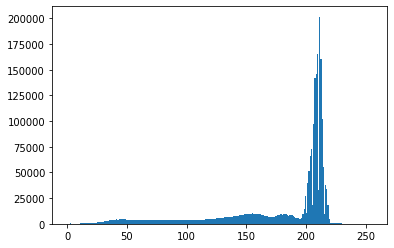

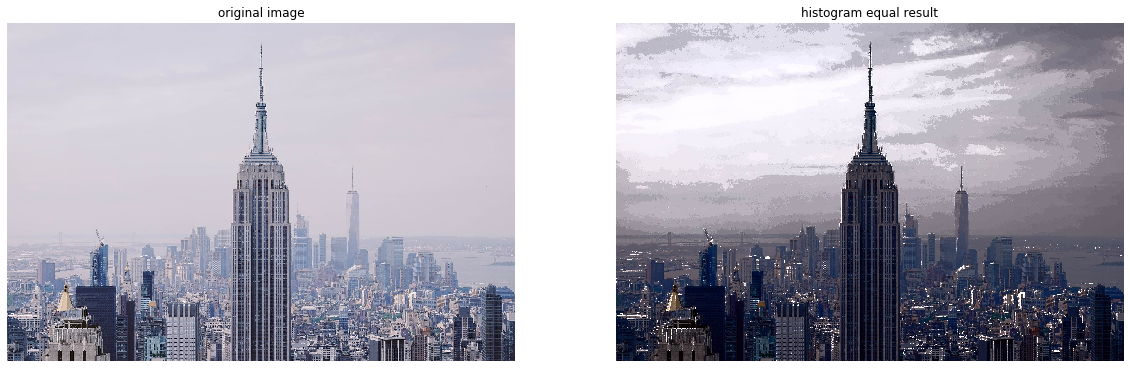

In [0]:
def histogram_equalization(img_in):
    
    # Write histogram equalization here
    #numpy to get image histogram
    hist, bins = np.histogram(img_in, 256, density=True)
    #calculate cdf
    #cdf = np.cumsum(img_grey)
    cdf = hist.cumsum()
    #normalise
    cdf = 255 * cdf / cdf[-1] 
    img_out = np.interp(img_in, bins[:-1], cdf)
    img_out = img_out.reshape(img_in.shape)
    img_out = img_out.astype(int)
    return True, img_out

    

    
# Read in input images
img_equal = cv2.imread('SourceImages/hist_equal.jpg', cv2.IMREAD_COLOR)
# Convert to another colour space 
img_input = cv2.cvtColor(img_equal,cv2.COLOR_BGR2YCrCb)
Y, c_r, c_b = cv2.split(img_input)

# calculate histogram
# plot histogram centered on values 0..255
plt.hist(Y.ravel(),255,[0,255])

# Histogram equalization
succeed, Y_equalized = histogram_equalization(Y)


img_input[:,:,0] = Y_equalized
#cv2.merge([Y_equalized, c_r, c_b])
output_image = cv2.cvtColor(img_input, cv2.COLOR_YCR_CB2BGR)

# Plot results
fig = plt.figure(figsize=(20, 15))
plt.subplot(1, 2, 1)
plt.imshow(img_equal[..., ::-1])
plt.title('original image')
plt.axis("off")


# Plot results
plt.subplot(1, 2, 2)
plt.imshow(output_image[..., ::-1])
plt.title('histogram equal result')
plt.axis("off")


# Write out results
cv2.imwrite("Results/P4_01.jpg", output_image)

- **Low and high pass filters**  

True

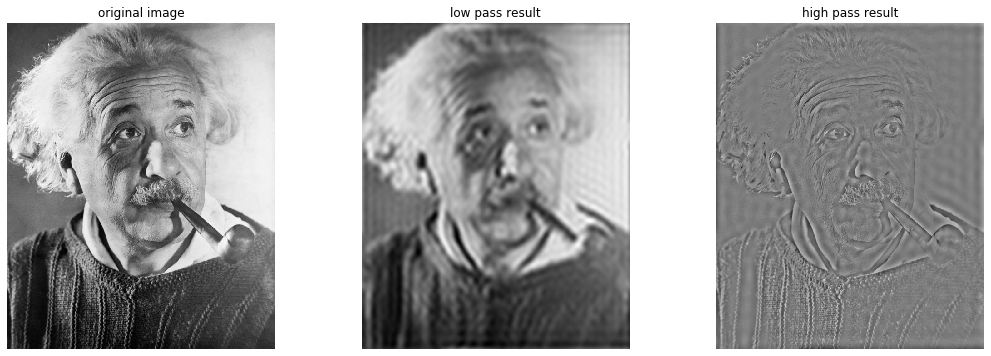

In [0]:
def test(img):
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    plt.subplot(121),plt.imshow(img, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()
   

def low_pass_filter(img):

    # Write low pass filter here to remove high frequency componenets 
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    rows, cols = img.shape
    center_row,center_col = rows//2 , cols//2
    # mask
    for i in range(0, rows):
        for j in range(0, cols):
            if ( i < center_row-30 or i > center_row+31 or j < center_col-30 or j > center_col+31):
                fshift[i,j] = 0
    
    # apply mask and inverse DFT
    f_ishift = np.fft.ifftshift(fshift)
    img_out = np.fft.ifft2(f_ishift)
    img_out = np.real(img_out)
    
    return True, img_out


def high_pass_filter(img):

    
    # Write high pass filter here
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    
    rows, cols = img.shape
    center_row,center_col = rows//2 , cols//2
    
    # mask
    fshift[center_row-20:center_row+21, center_col-20:center_col+21] = 0
    
    # apply mask and inverse DFT
    f_ishift = np.fft.ifftshift(fshift)
    img_out = np.fft.ifft2(f_ishift)
    img_out = np.real(img_out)
    
    return True, img_out

# Read in input images
img_filter = cv2.imread('SourceImages/Einstein.jpg', 0)

# Low and high pass filter
succeed1, output_low_pass_image1  = low_pass_filter(img_filter)
succeed2, output_high_pass_image2 = high_pass_filter(img_filter)

# Plot results

fig = plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(img_filter, 'gray')
plt.title('original image')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(output_low_pass_image1, 'gray')
plt.title('low pass result')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(output_high_pass_image2, 'gray')
plt.title('high pass result')
plt.axis("off")

# Write out results
cv2.imwrite("Results/P5_01.jpg", output_low_pass_image1)
cv2.imwrite("Results/P5_02.jpg", output_high_pass_image2)